<a href="https://colab.research.google.com/github/Bharathi022002/Covid-19_Prediction_ML/blob/main/COVID_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def covid():
  print("List of covid details")
covid()

List of covid details


DECLARATION OF GLOBAL AND LOCAL VARIABLE:

LIST:

In [ ]:
covid_places=["India","America","China","Delhi","Dubai"] 
print(covid_places[-1]) #negative indexing

Dubai


In [ ]:
covid_places=["India","America","China","Delhi","Dubai"] 
covid_places.append("Kerala") #appending
print(covid_places)

['India', 'America', 'China', 'Delhi', 'Dubai', 'Kerala']


In [ ]:
covid_places.remove("Delhi")
print(covid_places) #removing

['India', 'America', 'China', 'Dubai', 'Kerala']


In [ ]:
cases=[200,300,400,500]
print(covid_places+cases) #joining

['India', 'America', 'China', 'Dubai', 'Kerala', 200, 300, 400, 500]


NUMPY COMPUTING:

Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

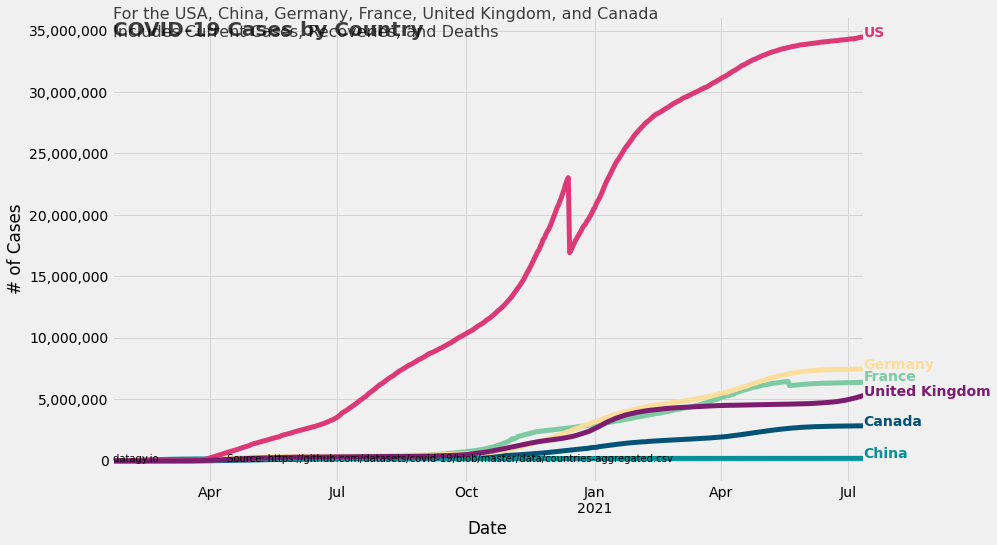

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df = df[df['Country'].isin(countries)]

df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 20, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)    